In [56]:
import graphlab as gl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
c_df = gl.SFrame.read_json('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json',orient='lines')

This non-commercial license of GraphLab Create is assigned to mkkedia@dons.usfca.edu and will expire on May 31, 2017. For commercial licensing options, visit https://dato.com/buy/.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10 started. Logging: /tmp/graphlab_server_1465185737.log


Finished parsing file /Users/mayankkedia/Documents/Jobs/Dato/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json

Parsing completed. Parsed 100 lines in 0.79679 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[dict]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/mayankkedia/Documents/Jobs/Dato/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json

Parsing completed. Parsed 55569 lines in 1.27803 secs.

# Checkins EDA

## Todo

- Total checkin count distribution
- Time of day distribution
- Day of week distribution
- Citywise ?

### Total checkin count 
- Median is 32 
- Max number of checkins is 77,320 !
        +--------------------+---------------+----------+
        |        item        |     value     | is exact |
        +--------------------+---------------+----------+
        |       Length       |     55569     |   Yes    |
        |        Min         |      3.0      |   Yes    |
        |        Max         |    77320.0    |   Yes    |
        |        Mean        | 148.799564505 |   Yes    |
        |        Sum         |   8268643.0   |   Yes    |
        |      Variance      | 455073.962993 |   Yes    |
        | Standard Deviation | 674.591700952 |   Yes    |
        |  # Missing Values  |       0       |   Yes    |
        |  # unique values   |      1977     |    No    |
        +--------------------+---------------+----------+

        Most frequent items:
        +-------+------+------+------+------+------+------+------+------+------+------+
        | value |  4   |  5   |  3   |  6   |  7   |  8   |  9   |  10  |  11  |  12  |
        +-------+------+------+------+------+------+------+------+------+------+------+
        | count | 1944 | 1942 | 1751 | 1716 | 1637 | 1503 | 1326 | 1256 | 1129 | 1087 |
        +-------+------+------+------+------+------+------+------+------+------+------+

        Quantiles: 
        +-----+-----+-----+------+------+-------+-------+--------+---------+
        |  0% |  1% |  5% | 25%  | 50%  |  75%  |  95%  |  99%   |   100%  |
        +-----+-----+-----+------+------+-------+-------+--------+---------+
        | 3.0 | 3.0 | 4.0 | 11.0 | 32.0 | 105.0 | 601.0 | 1846.0 | 77320.0 |
        +-----+-----+-----+------+------+-------+-------+--------+---------+
        
### Day of Week 

#### Total checkins 
   
    X.0     967849.0
    X.1     966084.0
    X.2     991035.0
    X.3    1046456.0
    X.4    1376882.0
    X.5    1646764.0
    X.6    1273573.0
   
   
### Time of Day analysis
 
    0     109055.0
    1      67088.0
    2      43148.0
    3      36869.0
    4      46015.0
    5      73470.0
    6     109825.0
    7     181138.0
    8     257988.0
    9     343658.0
    10    427798.0
    11    592825.0
    12    676492.0
    13    570874.0
    14    503357.0
    15    501157.0
    16    555627.0
    17    660543.0
    18    706922.0
    19    629080.0
    20    473358.0
    21    333244.0
    22    216467.0
    23    152645.0
    dtype: float64
    
    Look at plot ! 


In [3]:
c_df.head(2)


business_id,checkin_info,type
cE27W9VPgO88Qxe4ol6y_g,"{'9-5': 1, '7-5': 1,'13-3': 1, '17-6': 1, ...",checkin
mVHrayjG3uZ_RLHkLj-AMg,"{'11-5': 1, '9-5': 1,'9-4': 3, '15-1': 1, ...",checkin


In [8]:
#checking whether  there are other 'types'
c_df['type'].sketch_summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      | 55569 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   1   |    No    |
+------------------+-------+----------+

Most frequent items:
+-------+---------+
| value | checkin |
+-------+---------+
| count |  55569  |
+-------+---------+


In [5]:
c_df['total_checkins'] = c_df['checkin_info'].apply(lambda x: sum(x.values()))

In [6]:
c_df['total_checkins'].sketch_summary()


+--------------------+---------------+----------+
|        item        |     value     | is exact |
+--------------------+---------------+----------+
|       Length       |     55569     |   Yes    |
|        Min         |      3.0      |   Yes    |
|        Max         |    77320.0    |   Yes    |
|        Mean        | 148.799564505 |   Yes    |
|        Sum         |   8268643.0   |   Yes    |
|      Variance      | 455073.962993 |   Yes    |
| Standard Deviation | 674.591700952 |   Yes    |
|  # Missing Values  |       0       |   Yes    |
|  # unique values   |      1977     |    No    |
+--------------------+---------------+----------+

Most frequent items:
+-------+------+------+------+------+------+------+------+------+------+------+
| value |  4   |  5   |  3   |  6   |  7   |  8   |  9   |  10  |  11  |  12  |
+-------+------+------+------+------+------+------+------+------+------+------+
| count | 1944 | 1942 | 1751 | 1716 | 1637 | 1503 | 1326 | 1256 | 1129 | 1087 |
+------

In [17]:
def time_of_day_count(d):
    ret_d = {}
    for k in d:
        new_k = k.split('-')[0]
        if new_k in ret_d:
            ret_d[new_k] += d[k]
        else:
            ret_d[new_k] = d[k]
    return ret_d

def day_of_week_count(d):
    ret_d = {}
    for k in d:
        new_k = k.split('-')[1]
        if new_k in ret_d:
            ret_d[new_k] += d[k]
        else:
            ret_d[new_k] = d[k]
    return ret_d

In [9]:
'12-2'.split('-')

['12', '2']

In [18]:
# Time of day and day of week split
c_df['tod'] = c_df['checkin_info'].apply(time_of_day_count)
c_df['dow'] = c_df['checkin_info'].apply(day_of_week_count)

In [19]:
c_df.head()

business_id,checkin_info,type,total_checkins,tod
cE27W9VPgO88Qxe4ol6y_g,"{'9-5': 1, '7-5': 1,'13-3': 1, '17-6': 1, ...",checkin,9,"{'10': 1, '13': 2, '14':1, '17': 2, '18': 1, ..."
mVHrayjG3uZ_RLHkLj-AMg,"{'11-5': 1, '9-5': 1,'9-4': 3, '15-1': 1, ...",checkin,23,"{'11': 1, '10': 4, '13':1, '12': 3, '15': 4, ..."
KayYbHCt-RkbGcPdGOThNg,"{'23-1': 1, '11-2': 2,'21-4': 1, '16-3': 1, ...",checkin,55,"{'11': 5, '10': 3, '13':6, '12': 4, '15': 7, ..."
b12U9TFESStdy7CsTtcOeg,"{'5-5': 2, '5-1': 2,'8-2': 1} ...",checkin,5,"{'8': 1, '5': 4}"
QoDa50dc7g62xciFygXB9w,"{'15-1': 1, '13-3': 1,'16-0': 1, '9-3': 1, ...",checkin,5,"{'9': 1, '13': 1, '12':1, '15': 1, '16': 1} ..."
1_lU0-eSWJCRvNGk78Zh9Q,"{'11-6': 1, '18-4': 1,'15-4': 1, '10-6': 1} ...",checkin,4,"{'11': 1, '18': 1, '15':1, '10': 1} ..."
_qopVQ6_Mz6W7-Pmbi56GQ,"{'5-4': 1, '12-5': 2,'8-3': 1} ...",checkin,4,"{'8': 1, '12': 2, '5': 1}"
wJr6kSA5dchdgOdwH6dZ2w,"{'9-0': 1, '5-6': 1,'11-4': 1, '19-6': 1, ...",checkin,15,"{'11': 2, '12': 1, '14':1, '17': 1, '19': 1, ..."
yXuao0pFz1AxB21vJjDf5w,"{'9-5': 2, '9-4': 1,'18-1': 1, '14-0': 1, ...",checkin,23,"{'10': 3, '13': 1, '12':2, '14': 5, '17': 2, ..."
fNGIbpazjTRdXgwRY_NIXA,"{'9-0': 1, '9-4': 1,'4-1': 1, '15-3': 1, ...",checkin,11,"{'10': 2, '13': 1, '15':2, '22': 1, '16': 2, ..."


In [24]:
dow = c_df['dow'].unpack().to_dataframe()
dow.fillna(0, inplace=True)

In [33]:
print dow.describe()

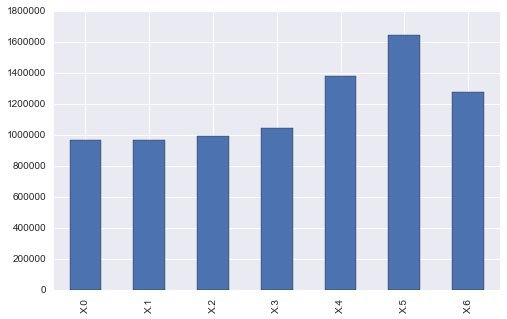

In [61]:
plt.figure(figsize=(8,5))
dow.sum().plot('bar')

In [38]:
tod = c_df['tod'].unpack().to_dataframe()
tod.fillna(0, inplace=True)

In [52]:
tod_sum = tod.sum() 
tod_sum.index = map(lambda x: int(x.split('.')[1]),tod_sum.index.tolist())

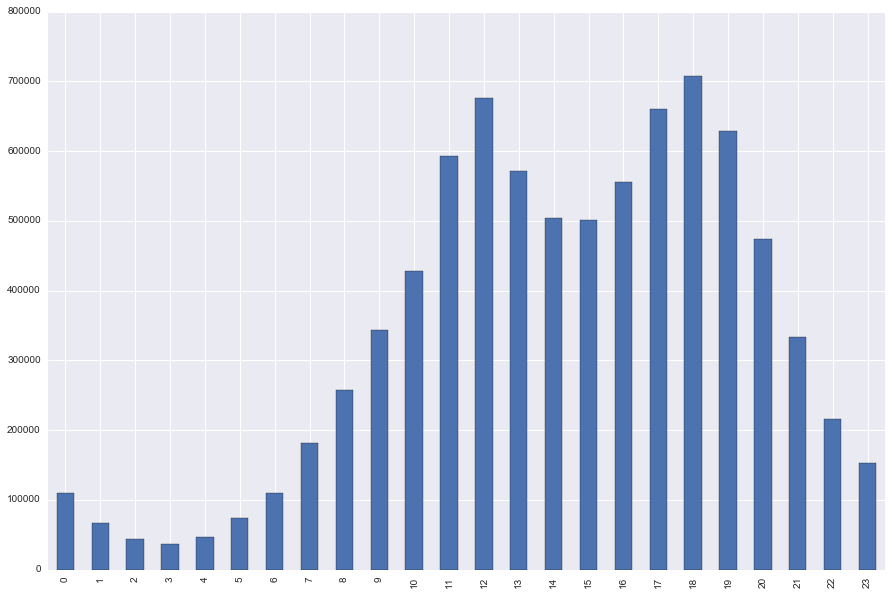

In [58]:
plt.figure(figsize=(15,10))
tod_sum.sort_index().plot('bar')

In [65]:
tod_sum.sort_index()

0     109055.0
1      67088.0
2      43148.0
3      36869.0
4      46015.0
5      73470.0
6     109825.0
7     181138.0
8     257988.0
9     343658.0
10    427798.0
11    592825.0
12    676492.0
13    570874.0
14    503357.0
15    501157.0
16    555627.0
17    660543.0
18    706922.0
19    629080.0
20    473358.0
21    333244.0
22    216467.0
23    152645.0
dtype: float64